<a href="https://colab.research.google.com/github/aldodec/ML_Notebooks/blob/master/Omdena_Creedix_User_Characteristics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
#plt.style.use('fivethirtyeight')

### NOTE: you can go to the bottom of the notebook gor getting the database in one cell, or go through this walk-through.

# Analysis by User: Global Data

In [ ]:
transaction = pd.read_excel('TRANSACTION DATA OF BANK X_OCT DES 2019.xlsx')
customer = pd.read_excel('CUSTOMER BANK X.xlsx')

In [ ]:
## Sorting transaction by date
transaction_sorted = transaction.sort_values('TRX_DATE')

In [ ]:
transaction_sorted.head()

,CIF_NO,TRX_DATE,RECID,TIME,ACCOUNT_NO,AT_CHG_CODE,AT_CHG_DESC,CHANNEL,CHANNEL2,CATEGORY,DETAIL_CATEGORY,ISSUER,STATUS,AREA_ACCOUNT,REGION_ACCOUNT,AMT_TRX
726243,74960135,2019-10-01,FT19274C8T9S;1,08:46,7052095615,18015117,INDOSAT PREPAID - BANKXMOBILE,MOBILE,MOBILE,PAYMENT,PAYMENT INDOSAT PREPAID,0,YES,AREA SOLO,REGION V/ SEMARANG,50000.0
39199,74468711,2019-10-01,FT1927443LZ9;1,13:27,7084707748,40111117,TRF BANKX TO BANKX - BANKXMOBILE,MOBILE,MOBILE,TRANSFER,TRANSFER PINBUK,0,YES,AREA BEKASI,REGION III/ JAKARTA,50000.0
375167,77313376,2019-10-01,FT192746C9TN;1,09:57,1645201004,19907620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AREA PEMATANGSIANTAR,REGION I/ MEDAN,1550000.0
766908,74117189,2019-10-01,FT19274LHC54;1,09:13,7070650917,40111117,TRF BANKX TO BANKX - BANKXMOBILE,MOBILE,MOBILE,TRANSFER,TRANSFER PINBUK,0,YES,AREA PALEMBANG,REGION II/ PALEMBANG,50000.0
766903,73000527,2019-10-01,FT19274YQ4VQ;1,19:57,7080004728,01110011,CASH WITHDRAWAL BANKX - BANKX ATM,ATM BANKX,ATM,CASH WITHDRAWAL,CASH WITHDRAWAL,BANKX CARD,YES,AREA JAKARTA MAYESTIK,REGION III/ JAKARTA,600000.0


 We construct a dataframe focused on user features:

main features computed:

  - total amount transacted during whole period
  - total number of transactions during whole period
  - total number of active days during whole period

 We also compute composite features:
   - ratio of amount per transaction
   - ratio of amount per active days
   - ratio of transactions per active days

In [ ]:

active_days_list =[]
cif_no_list = []
total_amount_list = []
number_transactions_list = []


for cif_no in transaction_sorted['CIF_NO'].unique():
    cif_no_list.append(cif_no)
    active_days_list.append(len(transaction_sorted[transaction_sorted['CIF_NO']==cif_no]['TRX_DATE'].unique()))
    total_amount_list.append(transaction_sorted[transaction_sorted['CIF_NO']==cif_no]['AMT_TRX'].sum())
    number_transactions_list.append(transaction_sorted[transaction_sorted['CIF_NO']==cif_no]['RECID'].count())

df_user = pd.DataFrame({'CIF_NO':cif_no_list,'Total_Amount':total_amount_list,'Number_Transactions':number_transactions_list,'Active_Days':active_days_list})
df_user['Amount_per_Transaction'] = df_user['Total_Amount']/df_user['Number_Transactions']
df_user['Amount_per_Active_Days'] = df_user['Total_Amount']/df_user['Active_Days']
df_user['Transactions_per_Active_Days'] = df_user['Number_Transactions']/df_user['Active_Days']

In [ ]:
df_user.head()

,CIF_NO,Total_Amount,Number_Transactions,Active_Days,Amount_per_Transaction,Amount_per_Active_Days,Transactions_per_Active_Days
0,74960135,17384093.0,44,23,3.950930e+05,7.558301e+05,1.913043
1,74468711,56383452.0,70,40,8.054779e+05,1.409586e+06,1.750000
2,77313376,565361379.0,472,54,1.197800e+06,1.046966e+07,8.740741
3,74117189,48620403.0,126,65,3.858762e+05,7.480062e+05,1.938462
4,73000527,64759140.0,157,67,4.124786e+05,9.665543e+05,2.343284


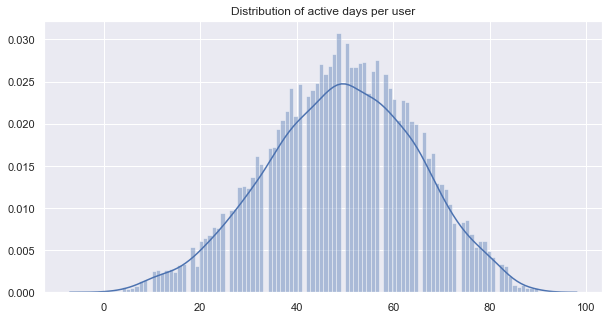

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(active_days_list,bins = 100)
plt.title('Distribution of active days per user')
plt.show()

### pair plot of all metrics:

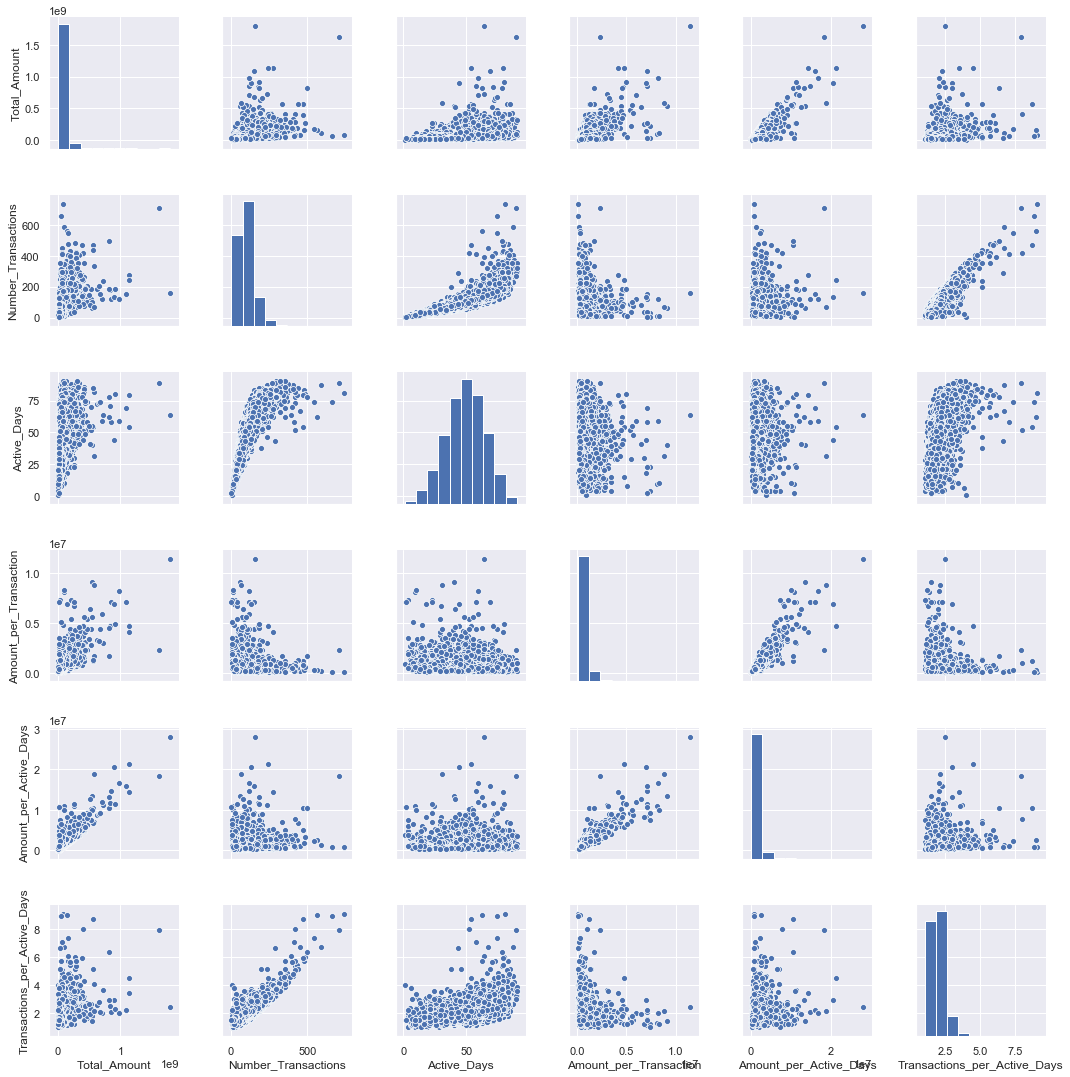

In [ ]:
sns.pairplot(df_user[['Total_Amount','Number_Transactions','Active_Days','Amount_per_Transaction','Amount_per_Active_Days','Transactions_per_Active_Days']])
plt.show()

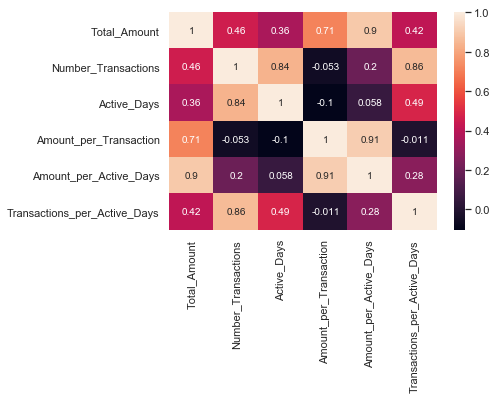

In [ ]:
sns.heatmap(df_user[['Total_Amount','Number_Transactions','Active_Days','Amount_per_Transaction','Amount_per_Active_Days','Transactions_per_Active_Days']].corr(),annot=True)
plt.show()

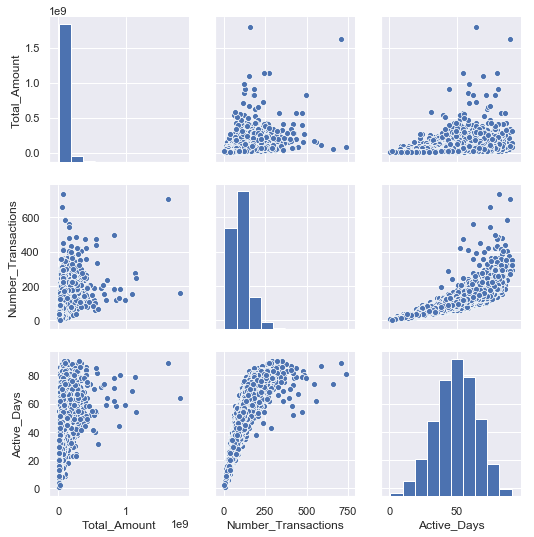

In [ ]:
sns.pairplot(df_user[['Total_Amount','Number_Transactions','Active_Days']])
plt.show()

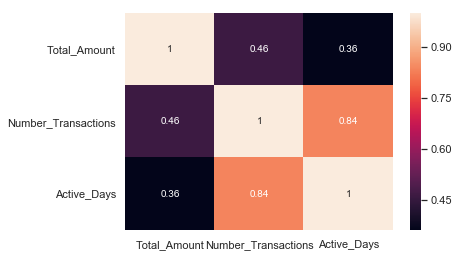

In [ ]:
sns.heatmap(df_user[['Total_Amount','Number_Transactions','Active_Days']].corr(),annot=True)
plt.show()

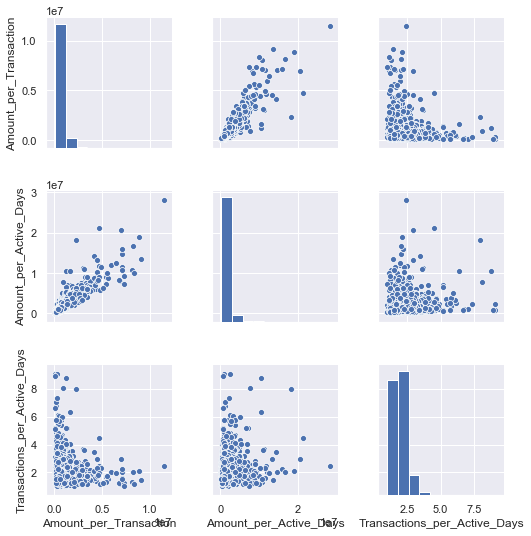

In [ ]:
sns.pairplot(df_user[['Amount_per_Transaction','Amount_per_Active_Days','Transactions_per_Active_Days']])
plt.show()

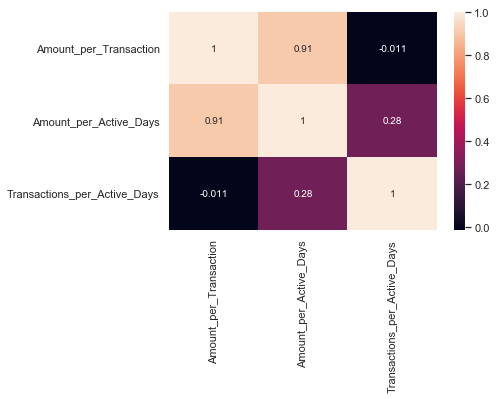

In [ ]:
sns.heatmap(df_user[['Amount_per_Transaction','Amount_per_Active_Days','Transactions_per_Active_Days']].corr(),annot=True)
plt.show()

# Analysis by User: Global Data Taking Month into Consideration

We construct 3 separate dataframes per month:


In [ ]:
transaction_month_1 = transaction_sorted[(transaction_sorted['TRX_DATE']>='2019-10-01') & (transaction_sorted['TRX_DATE']<='2019-10-31') ]
transaction_month_2 = transaction_sorted[(transaction_sorted['TRX_DATE']>='2019-11-01') & (transaction_sorted['TRX_DATE']<='2019-11-30') ]
transaction_month_3 = transaction_sorted[(transaction_sorted['TRX_DATE']>='2019-12-01') & (transaction_sorted['TRX_DATE']<='2019-12-31') ]

In [ ]:

active_days_list_M1 =[]
cif_no_list_M1 = []
total_amount_list_M1 = []
number_transactions_list_M1 = []


for cif_no in transaction_month_1['CIF_NO'].unique():
    cif_no_list_M1.append(cif_no)
    active_days_list_M1.append(len(transaction_month_1[transaction_month_1['CIF_NO']==cif_no]['TRX_DATE'].unique()))
    total_amount_list_M1.append(transaction_month_1[transaction_month_1['CIF_NO']==cif_no]['AMT_TRX'].sum())
    number_transactions_list_M1.append(transaction_month_1[transaction_month_1['CIF_NO']==cif_no]['RECID'].count())
    


df_user_M1 = pd.DataFrame({'CIF_NO':cif_no_list_M1,'Total_Amount_M1':total_amount_list_M1,'Number_Transactions_M1':number_transactions_list_M1,'Active_Days_M1':active_days_list_M1})
df_user_M1['Amount_per_Transaction_M1'] = df_user_M1['Total_Amount_M1']/df_user_M1['Number_Transactions_M1']
df_user_M1['Amount_per_Active_Days_M1'] = df_user_M1['Total_Amount_M1']/df_user_M1['Active_Days_M1']
df_user_M1['Transactions_per_Active_Days_M1'] = df_user_M1['Number_Transactions_M1']/df_user_M1['Active_Days_M1']

active_days_list_M2 =[]
cif_no_list_M2 = []
total_amount_list_M2 = []
number_transactions_list_M2 = []


for cif_no in transaction_month_2['CIF_NO'].unique():
    cif_no_list_M2.append(cif_no)
    active_days_list_M2.append(len(transaction_month_2[transaction_month_2['CIF_NO']==cif_no]['TRX_DATE'].unique()))
    total_amount_list_M2.append(transaction_month_2[transaction_month_2['CIF_NO']==cif_no]['AMT_TRX'].sum())
    number_transactions_list_M2.append(transaction_month_2[transaction_month_2['CIF_NO']==cif_no]['RECID'].count())
    


df_user_M2 = pd.DataFrame({'CIF_NO':cif_no_list_M2,'Total_Amount_M2':total_amount_list_M2,'Number_Transactions_M2':number_transactions_list_M2,'Active_Days_M2':active_days_list_M2})
df_user_M2['Amount_per_Transaction_M2'] = df_user_M2['Total_Amount_M2']/df_user_M2['Number_Transactions_M2']
df_user_M2['Amount_per_Active_Days_M2'] = df_user_M2['Total_Amount_M2']/df_user_M2['Active_Days_M2']
df_user_M2['Transactions_per_Active_Days_M2'] = df_user_M2['Number_Transactions_M2']/df_user_M2['Active_Days_M2']

active_days_list_M3 =[]
cif_no_list_M3 = []
total_amount_list_M3 = []
number_transactions_list_M3 = []


for cif_no in transaction_month_3['CIF_NO'].unique():
    cif_no_list_M3.append(cif_no)
    active_days_list_M3.append(len(transaction_month_3[transaction_month_3['CIF_NO']==cif_no]['TRX_DATE'].unique()))
    total_amount_list_M3.append(transaction_month_3[transaction_month_3['CIF_NO']==cif_no]['AMT_TRX'].sum())
    number_transactions_list_M3.append(transaction_month_3[transaction_month_3['CIF_NO']==cif_no]['RECID'].count())
    


df_user_M3 = pd.DataFrame({'CIF_NO':cif_no_list_M3,'Total_Amount_M3':total_amount_list_M3,'Number_Transactions_M3':number_transactions_list_M3,'Active_Days_M3':active_days_list_M3})
df_user_M3['Amount_per_Transaction_M3'] = df_user_M3['Total_Amount_M3']/df_user_M3['Number_Transactions_M3']
df_user_M3['Amount_per_Active_Days_M3'] = df_user_M3['Total_Amount_M3']/df_user_M3['Active_Days_M3']
df_user_M3['Transactions_per_Active_Days_M3'] = df_user_M3['Number_Transactions_M3']/df_user_M3['Active_Days_M3']

In [ ]:
df_user_M3.head()

,CIF_NO,Total_Amount_M3,Number_Transactions_M3,Active_Days_M3,Amount_per_Transaction_M3,Amount_per_Active_Days_M3,Transactions_per_Active_Days_M3
0,74263065,16265356.0,39,23,417060.410256,7.071894e+05,1.695652
1,73340985,12459400.0,14,10,889957.142857,1.245940e+06,1.400000
2,75592529,11193618.0,39,25,287015.846154,4.477447e+05,1.560000
3,80947632,3833600.0,24,12,159733.333333,3.194667e+05,2.000000
4,74698580,32196500.0,47,21,685031.914894,1.533167e+06,2.238095


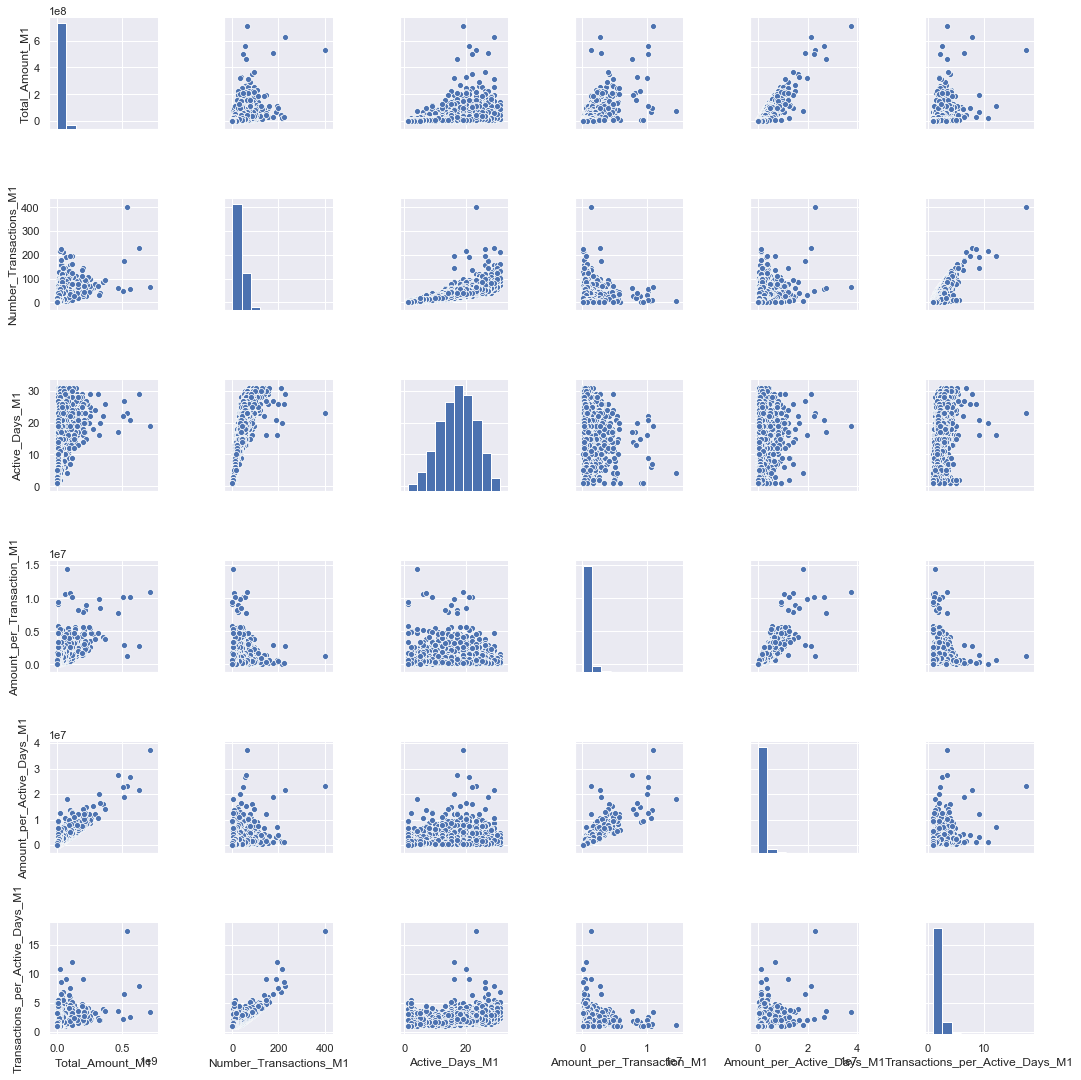

In [ ]:
sns.pairplot(df_user_M1[['Total_Amount_M1','Number_Transactions_M1','Active_Days_M1','Amount_per_Transaction_M1','Amount_per_Active_Days_M1','Transactions_per_Active_Days_M1']])
plt.show()

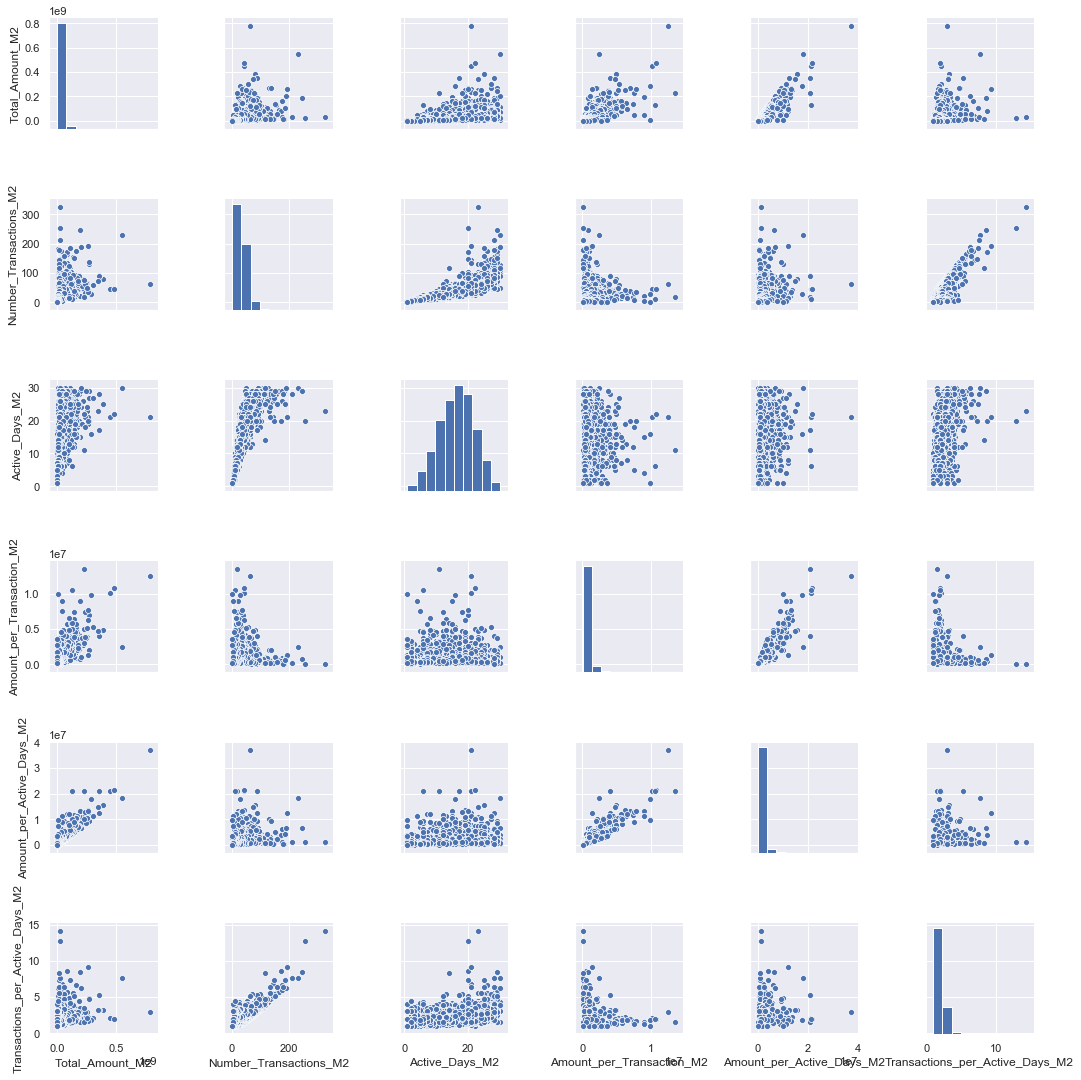

In [ ]:
sns.pairplot(df_user_M2[['Total_Amount_M2','Number_Transactions_M2','Active_Days_M2','Amount_per_Transaction_M2','Amount_per_Active_Days_M2','Transactions_per_Active_Days_M2']])
plt.show()

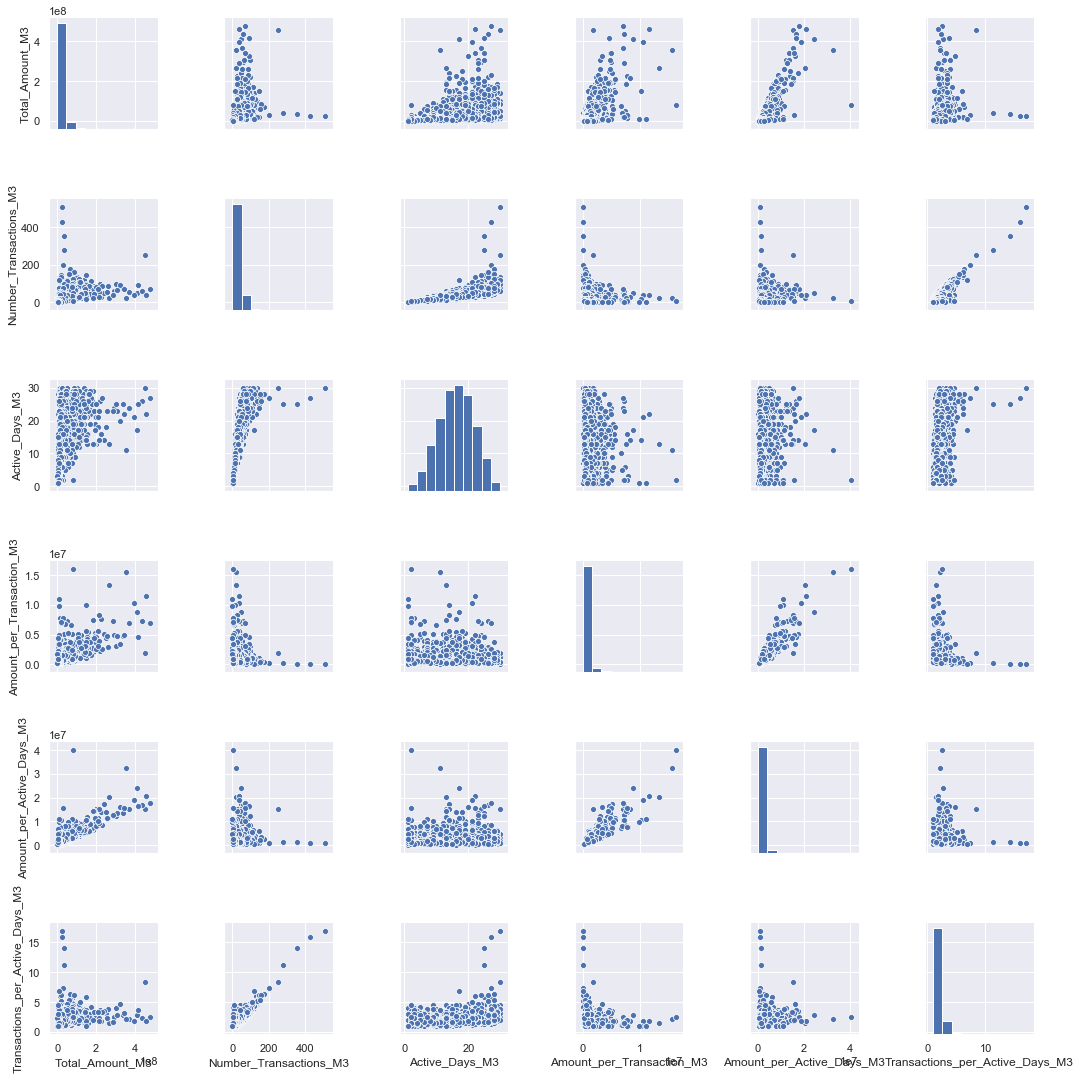

In [ ]:
sns.pairplot(df_user_M3[['Total_Amount_M3','Number_Transactions_M3','Active_Days_M3','Amount_per_Transaction_M3','Amount_per_Active_Days_M3','Transactions_per_Active_Days_M3']])
plt.show()

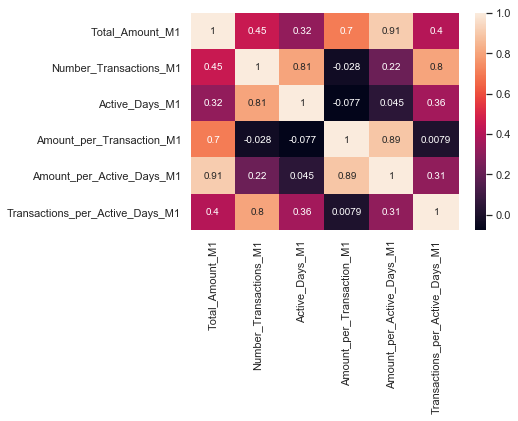

In [ ]:
sns.heatmap(df_user_M1[['Total_Amount_M1','Number_Transactions_M1','Active_Days_M1','Amount_per_Transaction_M1','Amount_per_Active_Days_M1','Transactions_per_Active_Days_M1']].corr(),annot=True)
plt.show()

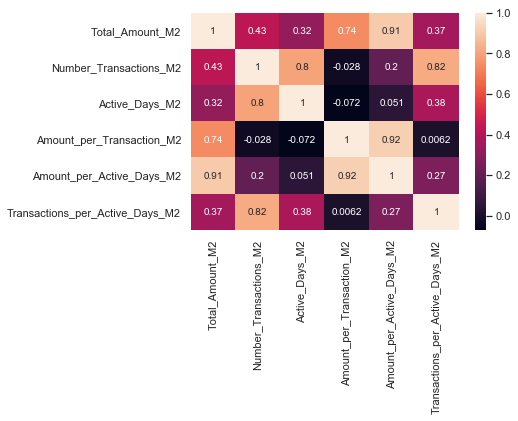

In [ ]:
sns.heatmap(df_user_M2[['Total_Amount_M2','Number_Transactions_M2','Active_Days_M2','Amount_per_Transaction_M2','Amount_per_Active_Days_M2','Transactions_per_Active_Days_M2']].corr(),annot=True)

plt.show()

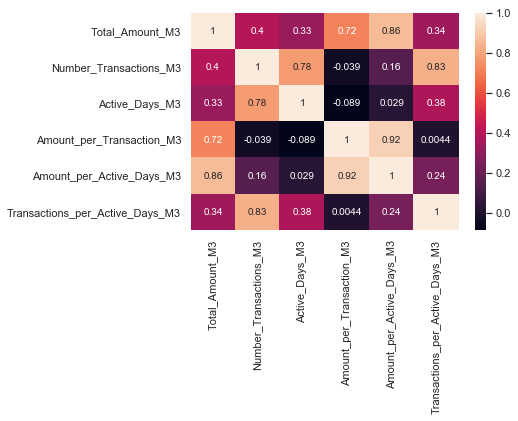

In [ ]:
sns.heatmap(df_user_M3[['Total_Amount_M3','Number_Transactions_M3','Active_Days_M3','Amount_per_Transaction_M3','Amount_per_Active_Days_M3','Transactions_per_Active_Days_M3']].corr(),annot=True)
plt.show()

# Analysis by User: Monthly Average (MA)

Using the individual info for each month, we build average quantities over those months:


In [ ]:

df_M12 = df_user_M1[['CIF_NO','Total_Amount_M1','Number_Transactions_M1','Active_Days_M1']].merge(df_user_M2[['CIF_NO','Total_Amount_M2','Number_Transactions_M2','Active_Days_M2']],on='CIF_NO',how='outer')

df_M = df_user_M3[['CIF_NO','Total_Amount_M3','Number_Transactions_M3','Active_Days_M3']].merge(df_M12,on='CIF_NO',how='outer')

for i in df_M.columns[1:]:
    df_M[i].fillna(0,inplace=True)

df_M['Total_Amount_MA']=(df_M['Total_Amount_M1']+df_M['Total_Amount_M2']+df_M['Total_Amount_M3'])/3
df_M['Number_Transactions_MA']=(df_M['Number_Transactions_M1']+df_M['Number_Transactions_M2']+df_M['Number_Transactions_M3'])/3
df_M['Active_Days_MA']=(df_M['Active_Days_M1']+df_M['Active_Days_M2']+df_M['Active_Days_M3'])/3


In [ ]:
df_M.head(3)

,CIF_NO,Total_Amount_M3,Number_Transactions_M3,Active_Days_M3,Total_Amount_M1,Number_Transactions_M1,Active_Days_M1,Total_Amount_M2,Number_Transactions_M2,Active_Days_M2,Total_Amount_MA,Number_Transactions_MA,Active_Days_MA
0,74263065,16265356.0,39.0,23.0,14465616.0,27.0,17.0,10553952.0,19.0,11.0,1.376164e+07,28.333333,17.000000
1,73340985,12459400.0,14.0,10.0,22065704.0,25.0,14.0,21456001.0,21.0,13.0,1.866037e+07,20.000000,12.333333
2,75592529,11193618.0,39.0,25.0,14048245.0,37.0,21.0,7176000.0,21.0,16.0,1.080595e+07,32.333333,20.666667


The distribution of monthly average full transacted amount is:

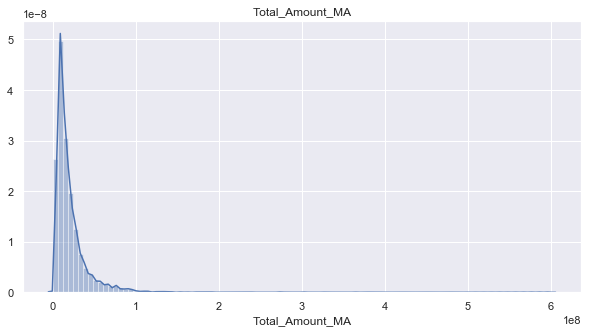

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(df_M['Total_Amount_MA'],bins = 100)
plt.title('Total_Amount_MA')
plt.show()

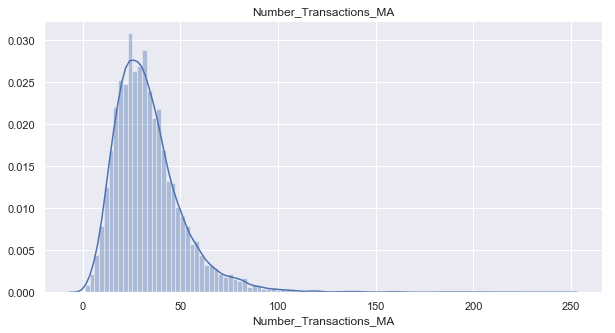

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(df_M['Number_Transactions_MA'],bins = 100)
plt.title('Number_Transactions_MA')
plt.show()

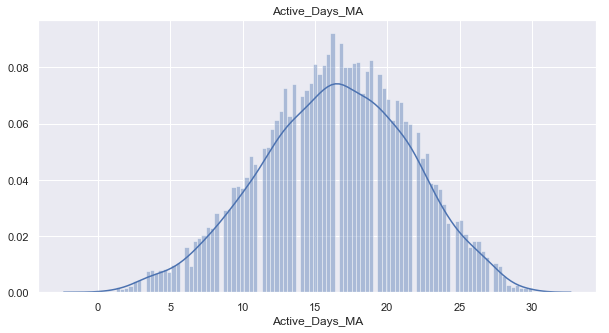

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(df_M['Active_Days_MA'],bins = 100)
plt.title('Active_Days_MA')
plt.show()

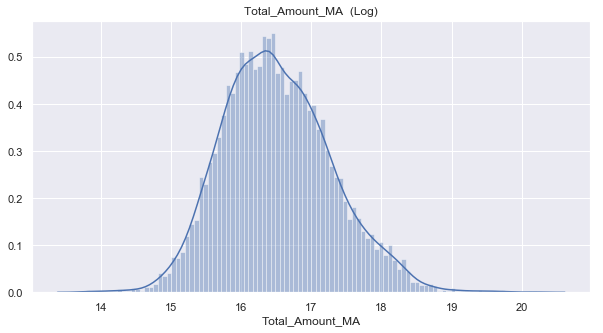

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(np.log(df_M['Total_Amount_MA']),bins = 100)
plt.title('Total_Amount_MA  (Log)')
plt.show()

### We divide the MA total amount distribution into deciles and quartiles

In [ ]:
df_M['Decile_Total_Amount']=pd.qcut(df_M['Total_Amount_MA'], 10, labels=False)
df_M['Quartile_Total_Amount']=pd.qcut(df_M['Total_Amount_MA'], 4,labels=False)

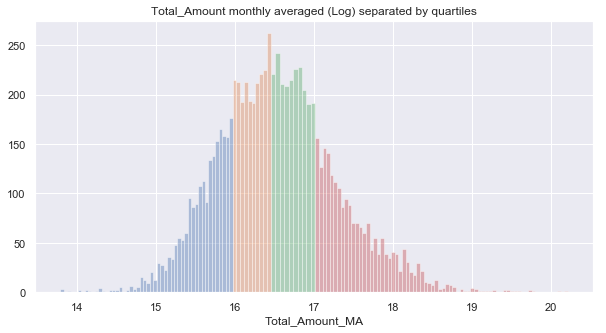

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(np.log(df_M[df_M['Quartile_Total_Amount']==0]['Total_Amount_MA']),bins = 50,kde=False)
sns.distplot(np.log(df_M[df_M['Quartile_Total_Amount']==1]['Total_Amount_MA']),bins = 10,kde=False)
sns.distplot(np.log(df_M[df_M['Quartile_Total_Amount']==2]['Total_Amount_MA']),bins = 10,kde=False)
sns.distplot(np.log(df_M[df_M['Quartile_Total_Amount']==3]['Total_Amount_MA']),bins = 70,kde=False)
plt.title('Total_Amount monthly averaged (Log) separated by quartiles')

plt.show()

## We merge al user data obtained so far

In [ ]:
df_user = df_user.merge(df_M,on='CIF_NO',how='outer')

In [ ]:
df_user.head()

,CIF_NO,Total_Amount,Number_Transactions,Active_Days,Amount_per_Transaction,Amount_per_Active_Days,Transactions_per_Active_Days,Total_Amount_M3,Number_Transactions_M3,Active_Days_M3,...,Number_Transactions_M1,Active_Days_M1,Total_Amount_M2,Number_Transactions_M2,Active_Days_M2,Total_Amount_MA,Number_Transactions_MA,Active_Days_MA,Decile_Total_Amount,Quartile_Total_Amount
0,74960135,17384093.0,44,23,3.950930e+05,7.558301e+05,1.913043,6680959.0,10.0,5.0,...,24.0,12.0,2137274.0,10.0,6.0,5.794698e+06,14.666667,7.666667,0,0
1,74468711,56383452.0,70,40,8.054779e+05,1.409586e+06,1.750000,33978917.0,29.0,17.0,...,21.0,12.0,15943180.0,20.0,11.0,1.879448e+07,23.333333,13.333333,6,2
2,77313376,565361379.0,472,54,1.197800e+06,1.046966e+07,8.740741,28436128.0,35.0,13.0,...,402.0,23.0,5886888.0,35.0,18.0,1.884538e+08,157.333333,18.000000,9,3
3,74117189,48620403.0,126,65,3.858762e+05,7.480062e+05,1.938462,7400745.0,46.0,20.0,...,44.0,23.0,12695516.0,36.0,22.0,1.620680e+07,42.000000,21.666667,5,2
4,73000527,64759140.0,157,67,4.124786e+05,9.665543e+05,2.343284,23502993.0,59.0,27.0,...,51.0,20.0,19337407.0,47.0,20.0,2.158638e+07,52.333333,22.333333,6,2


## We study monthly behaviour of users active in all three months. 

In [ ]:
common_df1 = df_user_M1.merge(df_user_M2,on='CIF_NO')

common_df1.dropna(inplace=True)

common_df = common_df1.merge(df_user_M3,on='CIF_NO')

In [ ]:
common_df.head(3)

,CIF_NO,Total_Amount_M1,Number_Transactions_M1,Active_Days_M1,Amount_per_Transaction_M1,Amount_per_Active_Days_M1,Transactions_per_Active_Days_M1,Total_Amount_M2,Number_Transactions_M2,Active_Days_M2,Amount_per_Transaction_M2,Amount_per_Active_Days_M2,Transactions_per_Active_Days_M2,Total_Amount_M3,Number_Transactions_M3,Active_Days_M3,Amount_per_Transaction_M3,Amount_per_Active_Days_M3,Transactions_per_Active_Days_M3
0,74960135,8565860.0,24,12,3.569108e+05,7.138217e+05,2.000000,2137274.0,10,6,213727.4,3.562123e+05,1.666667,6680959.0,10,5,6.680959e+05,1.336192e+06,2.000000
1,74468711,6461355.0,21,12,3.076836e+05,5.384462e+05,1.750000,15943180.0,20,11,797159.0,1.449380e+06,1.818182,33978917.0,29,17,1.171687e+06,1.998760e+06,1.705882
2,77313376,531038363.0,402,23,1.320991e+06,2.308862e+07,17.478261,5886888.0,35,18,168196.8,3.270493e+05,1.944444,28436128.0,35,13,8.124608e+05,2.187394e+06,2.692308


## How does user a single metric changes on each month:

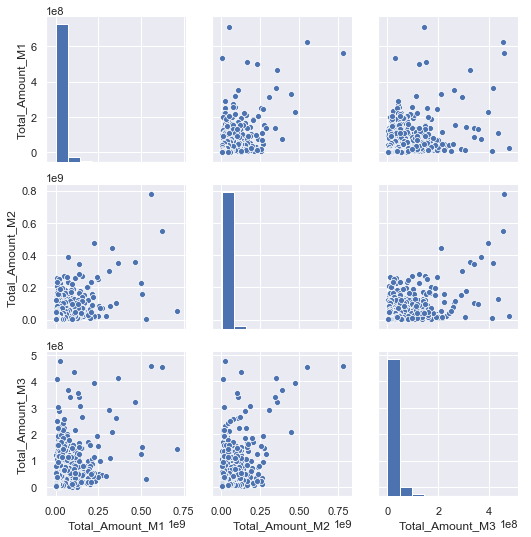

In [ ]:
sns.pairplot(common_df[['Total_Amount_M1','Total_Amount_M2','Total_Amount_M3']])
plt.show()

## How is each metric correlated monthly?

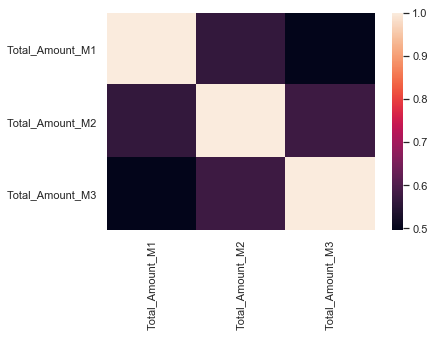

In [ ]:
sns.heatmap(common_df[['Total_Amount_M1','Total_Amount_M2','Total_Amount_M3']].corr())
plt.show()

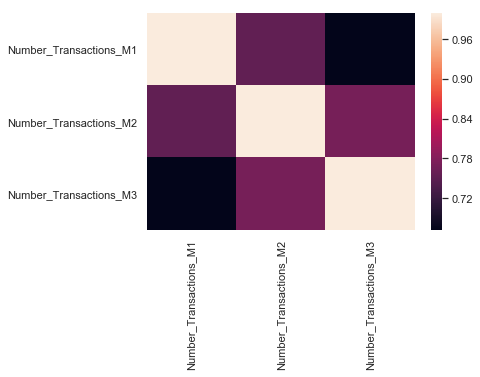

In [ ]:
sns.heatmap(common_df[['Number_Transactions_M1','Number_Transactions_M2','Number_Transactions_M3']].corr())
plt.show()

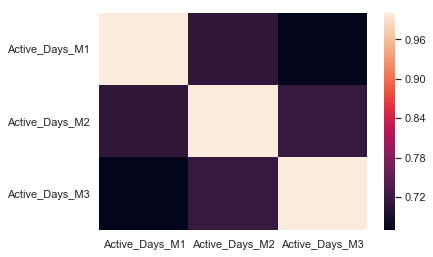

In [ ]:
sns.heatmap(common_df[['Active_Days_M1','Active_Days_M2','Active_Days_M3']].corr())
plt.show()

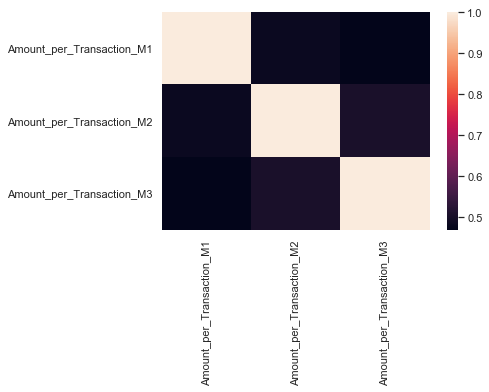

In [ ]:
sns.heatmap(common_df[['Amount_per_Transaction_M1','Amount_per_Transaction_M2','Amount_per_Transaction_M3']].corr())
plt.show()

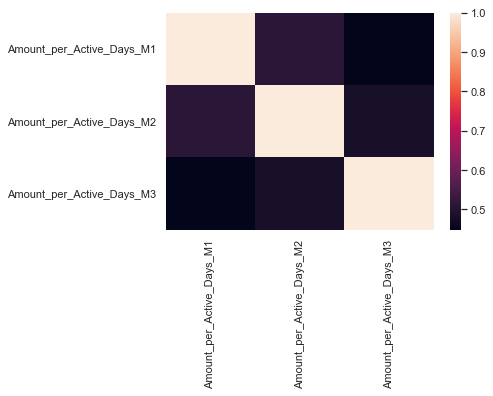

In [ ]:
sns.heatmap(common_df[['Amount_per_Active_Days_M1','Amount_per_Active_Days_M2','Amount_per_Active_Days_M3']].corr())
plt.show()

### Correlation is still no less than 0.5. Farther away months are less correlated than contiguous months.

## Adding Job Information

In [ ]:
job_df = pd.read_excel('JobTitle.xlsx')

job_df.dropna(inplace=True)

job_df['CIF_NO']=job_df['CIF_NO'].astype('int')

In [ ]:
job_df.head()

,CIF_NO,Job Title
0,73122693,Area Manager
1,73152323,Regional Business Strategy & Support Manager
2,73171319,Posting Control Officer
3,73266627,Professional Staff
4,73266639,Head Office Audit Department Head


## We analysis user monthly behaviour only of users with job description.

In [ ]:
df_user_jobs = df_user.merge(job_df,on='CIF_NO',how = 'outer')

In [ ]:
df_user_jobs.head()

,CIF_NO,Total_Amount,Number_Transactions,Active_Days,Amount_per_Transaction,Amount_per_Active_Days,Transactions_per_Active_Days,Total_Amount_M3,Number_Transactions_M3,Active_Days_M3,...,Active_Days_M1,Total_Amount_M2,Number_Transactions_M2,Active_Days_M2,Total_Amount_MA,Number_Transactions_MA,Active_Days_MA,Decile_Total_Amount,Quartile_Total_Amount,Job Title
0,74960135,17384093.0,44.0,23.0,3.950930e+05,7.558301e+05,1.913043,6680959.0,10.0,5.0,...,12.0,2137274.0,10.0,6.0,5.794698e+06,14.666667,7.666667,0.0,0.0,Pawning Staff
1,74468711,56383452.0,70.0,40.0,8.054779e+05,1.409586e+06,1.750000,33978917.0,29.0,17.0,...,12.0,15943180.0,20.0,11.0,1.879448e+07,23.333333,13.333333,6.0,2.0,Pawning Staff
2,77313376,565361379.0,472.0,54.0,1.197800e+06,1.046966e+07,8.740741,28436128.0,35.0,13.0,...,23.0,5886888.0,35.0,18.0,1.884538e+08,157.333333,18.000000,9.0,3.0,Teller
3,74117189,48620403.0,126.0,65.0,3.858762e+05,7.480062e+05,1.938462,7400745.0,46.0,20.0,...,23.0,12695516.0,36.0,22.0,1.620680e+07,42.000000,21.666667,5.0,2.0,Account Maintenance Staff
4,73000527,64759140.0,157.0,67.0,4.124786e+05,9.665543e+05,2.343284,23502993.0,59.0,27.0,...,20.0,19337407.0,47.0,20.0,2.158638e+07,52.333333,22.333333,6.0,2.0,Legal Advice Specialist


### List of 5 top job titles per decile:

In [ ]:
for i in range(10):
    print(5*'==========')
    print('DECILE',i+1,'\n')
    print(df_user_jobs[df_user_jobs['Decile_Total_Amount']==i]['Job Title'].value_counts().head(5))

DECILE 1 

Teller              182
Micro Analyst        81
Customer Service     79
Back Office          77
Pawning Staff        45
Name: Job Title, dtype: int64
DECILE 2 

Teller              107
Customer Service     81
Back Office          65
Pawning Staff        57
Micro Analyst        53
Name: Job Title, dtype: int64
DECILE 3 

Customer Service                       96
Teller                                 88
Retail Banking Relationship Manager    55
Pawning Staff                          51
Back Office                            50
Name: Job Title, dtype: int64
DECILE 4 

Customer Service                       78
Teller                                 76
Back Office                            56
Branch Operations & Service Manager    50
Retail Banking Relationship Manager    48
Name: Job Title, dtype: int64
DECILE 5 

Customer Service                       84
Teller                                 70
Branch Operations & Service Manager    65
Retail Banking Relationship Manager    

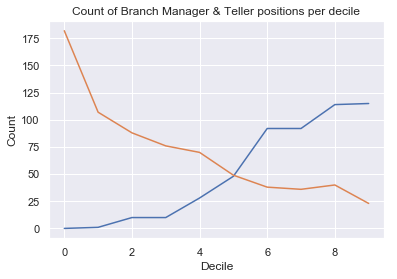

In [ ]:
decile_list = []
BM_count = []
teller_count = []
CM_list = []

for i in range(10):
    decile_list.append(i)
    BM_count.append(df_user_jobs[(df_user_jobs['Decile_Total_Amount']==i) & (df_user_jobs['Job Title']=='Branch Manager')]['CIF_NO'].count())
    teller_count.append(df_user_jobs[(df_user_jobs['Decile_Total_Amount']==i) & (df_user_jobs['Job Title']=='Teller')]['CIF_NO'].count())
    
sns.lineplot(x=decile_list,y =BM_count,)
sns.lineplot(x=decile_list,y =teller_count)
plt.xlabel('Decile')
plt.ylabel('Count')
plt.title('Count of Branch Manager & Teller positions per decile')
plt.show()

 ==========================================

# All the code in one cell.

In [ ]:
transaction = pd.read_excel('TRANSACTION DATA OF BANK X_OCT DES 2019.xlsx')
customer = pd.read_excel('CUSTOMER BANK X.xlsx')

#==============================================================

# We construct a dataframe focused on user features:

# main features computed:
#   -total amount transacted during whole period
#   -total number of transactions during whole period
#   -total number of active days during whole period

transaction_sorted = transaction.sort_values('TRX_DATE')
active_days_list =[]
cif_no_list = []
total_amount_list = []
number_transactions_list = []


for cif_no in transaction_sorted['CIF_NO'].unique():
    cif_no_list.append(cif_no)
    active_days_list.append(len(transaction_sorted[transaction_sorted['CIF_NO']==cif_no]['TRX_DATE'].unique()))
    total_amount_list.append(transaction_sorted[transaction_sorted['CIF_NO']==cif_no]['AMT_TRX'].sum())
    number_transactions_list.append(transaction_sorted[transaction_sorted['CIF_NO']==cif_no]['RECID'].count())

    
df_user = pd.DataFrame({'CIF_NO':cif_no_list,'Total_Amount':total_amount_list,'Number_Transactions':number_transactions_list,'Active_Days':active_days_list})

# We compute composite features:
#   - ratio of amount per transaction
#   - ratio of amount per active days
#   - ratio of transactions per active days

df_user['Amount_per_Transaction'] = df_user['Total_Amount']/df_user['Number_Transactions']
df_user['Amount_per_Active_Days'] = df_user['Total_Amount']/df_user['Active_Days']
df_user['Transactions_per_Active_Days'] = df_user['Number_Transactions']/df_user['Active_Days']

#==================================================================

# We construct 3 separatade transactiondataframes per month:
transaction_month_1 = transaction_sorted[(transaction_sorted['TRX_DATE']>='2019-10-01') & (transaction_sorted['TRX_DATE']<='2019-10-31') ]
transaction_month_2 = transaction_sorted[(transaction_sorted['TRX_DATE']>='2019-11-01') & (transaction_sorted['TRX_DATE']<='2019-11-30') ]
transaction_month_3 = transaction_sorted[(transaction_sorted['TRX_DATE']>='2019-12-01') & (transaction_sorted['TRX_DATE']<='2019-12-31') ]



active_days_list_M1 =[]
cif_no_list_M1 = []
total_amount_list_M1 = []
number_transactions_list_M1 = []


for cif_no in transaction_month_1['CIF_NO'].unique():
    cif_no_list_M1.append(cif_no)
    active_days_list_M1.append(len(transaction_month_1[transaction_month_1['CIF_NO']==cif_no]['TRX_DATE'].unique()))
    total_amount_list_M1.append(transaction_month_1[transaction_month_1['CIF_NO']==cif_no]['AMT_TRX'].sum())
    number_transactions_list_M1.append(transaction_month_1[transaction_month_1['CIF_NO']==cif_no]['RECID'].count())
    


df_user_M1 = pd.DataFrame({'CIF_NO':cif_no_list_M1,'Total_Amount_M1':total_amount_list_M1,'Number_Transactions_M1':number_transactions_list_M1,'Active_Days_M1':active_days_list_M1})
df_user_M1['Amount_per_Transaction_M1'] = df_user_M1['Total_Amount_M1']/df_user_M1['Number_Transactions_M1']
df_user_M1['Amount_per_Active_Days_M1'] = df_user_M1['Total_Amount_M1']/df_user_M1['Active_Days_M1']
df_user_M1['Transactions_per_Active_Days_M1'] = df_user_M1['Number_Transactions_M1']/df_user_M1['Active_Days_M1']

active_days_list_M2 =[]
cif_no_list_M2 = []
total_amount_list_M2 = []
number_transactions_list_M2 = []


for cif_no in transaction_month_2['CIF_NO'].unique():
    cif_no_list_M2.append(cif_no)
    active_days_list_M2.append(len(transaction_month_2[transaction_month_2['CIF_NO']==cif_no]['TRX_DATE'].unique()))
    total_amount_list_M2.append(transaction_month_2[transaction_month_2['CIF_NO']==cif_no]['AMT_TRX'].sum())
    number_transactions_list_M2.append(transaction_month_2[transaction_month_2['CIF_NO']==cif_no]['RECID'].count())
    


df_user_M2 = pd.DataFrame({'CIF_NO':cif_no_list_M2,'Total_Amount_M2':total_amount_list_M2,'Number_Transactions_M2':number_transactions_list_M2,'Active_Days_M2':active_days_list_M2})
df_user_M2['Amount_per_Transaction_M2'] = df_user_M2['Total_Amount_M2']/df_user_M2['Number_Transactions_M2']
df_user_M2['Amount_per_Active_Days_M2'] = df_user_M2['Total_Amount_M2']/df_user_M2['Active_Days_M2']
df_user_M2['Transactions_per_Active_Days_M2'] = df_user_M2['Number_Transactions_M2']/df_user_M2['Active_Days_M2']

active_days_list_M3 =[]
cif_no_list_M3 = []
total_amount_list_M3 = []
number_transactions_list_M3 = []


for cif_no in transaction_month_3['CIF_NO'].unique():
    cif_no_list_M3.append(cif_no)
    active_days_list_M3.append(len(transaction_month_3[transaction_month_3['CIF_NO']==cif_no]['TRX_DATE'].unique()))
    total_amount_list_M3.append(transaction_month_3[transaction_month_3['CIF_NO']==cif_no]['AMT_TRX'].sum())
    number_transactions_list_M3.append(transaction_month_3[transaction_month_3['CIF_NO']==cif_no]['RECID'].count())
    


df_user_M3 = pd.DataFrame({'CIF_NO':cif_no_list_M3,'Total_Amount_M3':total_amount_list_M3,'Number_Transactions_M3':number_transactions_list_M3,'Active_Days_M3':active_days_list_M3})
df_user_M3['Amount_per_Transaction_M3'] = df_user_M3['Total_Amount_M3']/df_user_M3['Number_Transactions_M3']
df_user_M3['Amount_per_Active_Days_M3'] = df_user_M3['Total_Amount_M3']/df_user_M3['Active_Days_M3']
df_user_M3['Transactions_per_Active_Days_M3'] = df_user_M3['Number_Transactions_M3']/df_user_M3['Active_Days_M3']

# Using the individual info for each month, we build average quantities over those months:

df_M12 = df_user_M1[['CIF_NO','Total_Amount_M1','Number_Transactions_M1','Active_Days_M1']].merge(df_user_M2[['CIF_NO','Total_Amount_M2','Number_Transactions_M2','Active_Days_M2']],on='CIF_NO',how='outer')

df_M = df_user_M3[['CIF_NO','Total_Amount_M3','Number_Transactions_M3','Active_Days_M3']].merge(df_M12,on='CIF_NO',how='outer')

for i in df_M.columns[1:]:
    df_M[i].fillna(0,inplace=True)

df_M['Total_Amount_MA']=(df_M['Total_Amount_M1']+df_M['Total_Amount_M2']+df_M['Total_Amount_M3'])/3
df_M['Number_Transactions_MA']=(df_M['Number_Transactions_M1']+df_M['Number_Transactions_M2']+df_M['Number_Transactions_M3'])/3
df_M['Active_Days_MA']=(df_M['Active_Days_M1']+df_M['Active_Days_M2']+df_M['Active_Days_M3'])/3

df_M['Decile_Total_Amount']=pd.qcut(df_M['Total_Amount_MA'], 10, labels=False)
df_M['Quartile_Total_Amount']=pd.qcut(df_M['Total_Amount_MA'], 4,labels=False)

# We add the job position info for each user:

df_user = df_user.merge(df_M,on='CIF_NO',how='outer')

job_df = pd.read_excel('JobTitle.xlsx')
job_df.dropna(inplace=True)
job_df['CIF_NO']=job_df['CIF_NO'].astype('int')

df_user_jobs = df_user.merge(job_df,on='CIF_NO',how = 'outer')